Saving Titanic-Dataset.csv to Titanic-Dataset (1).csv
🔹 Shape of the dataset: (891, 12)

🔹 Column names:
 ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

🔹 First 5 rows:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171

/tmp/ipython-input-2-2987135943.py:33: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


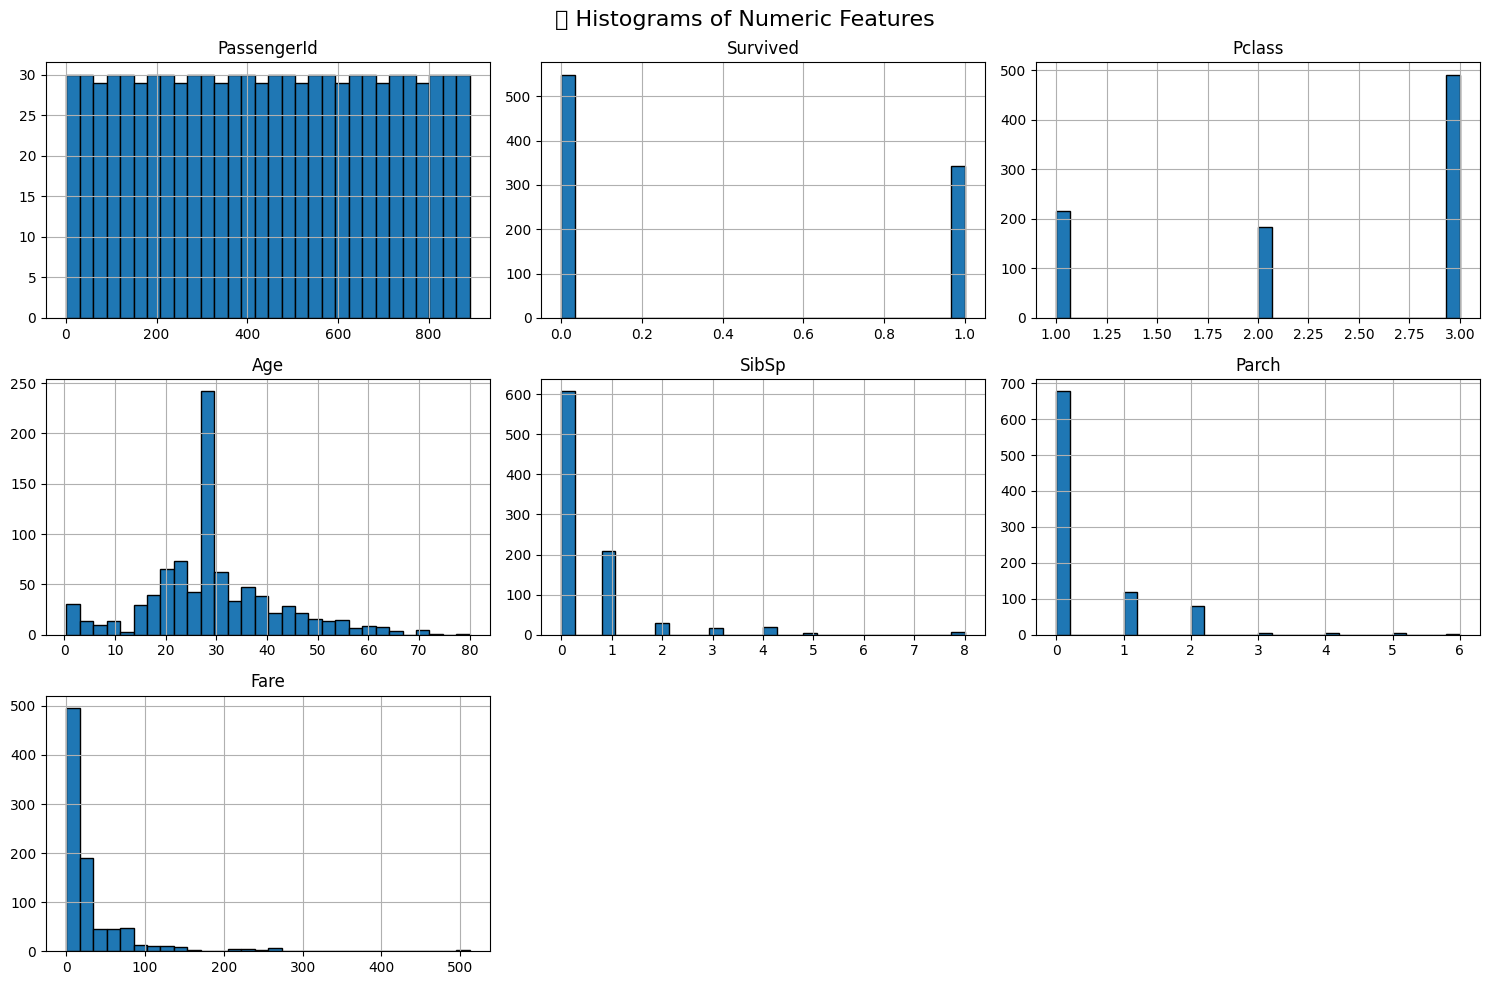

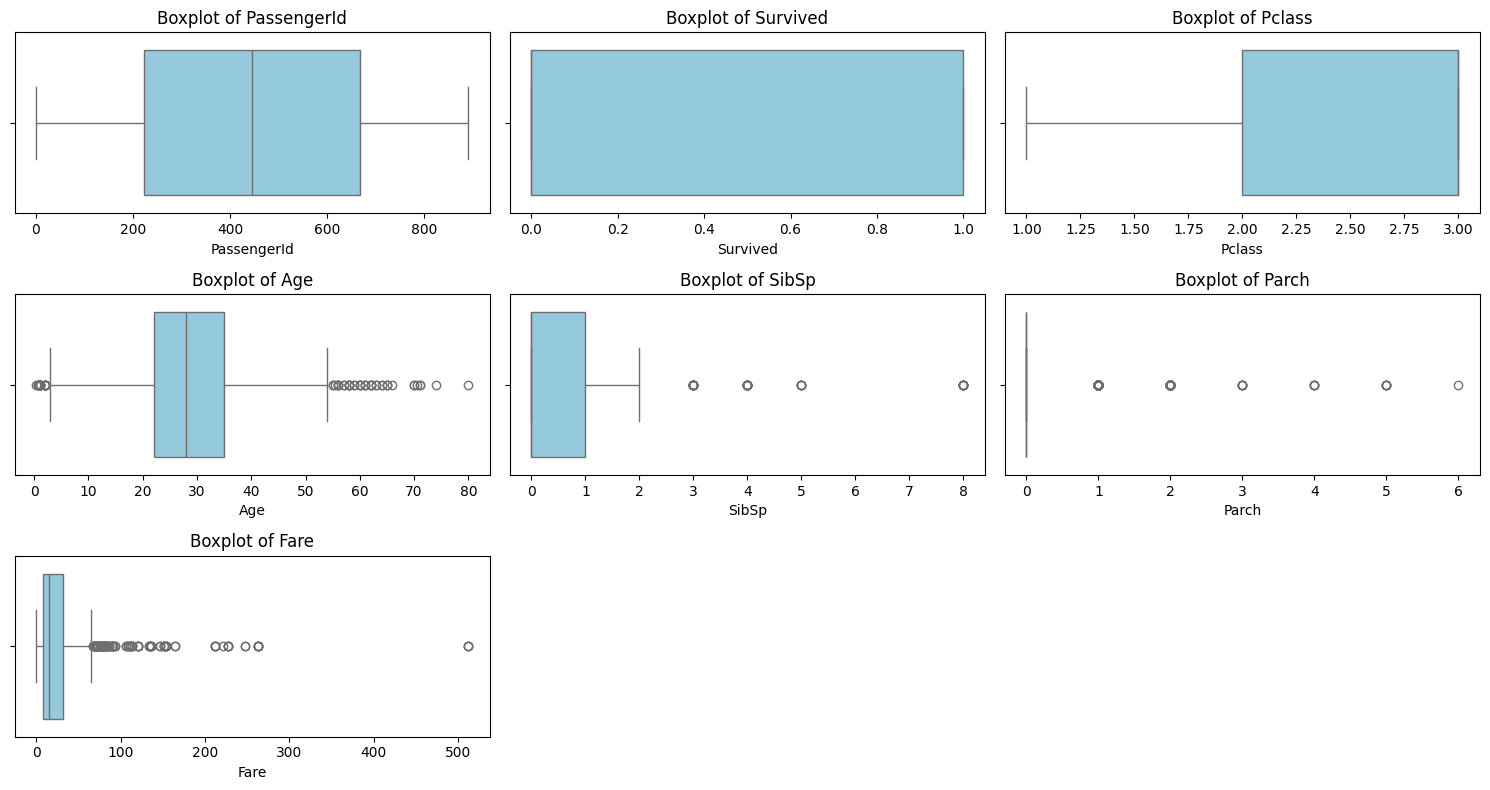

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


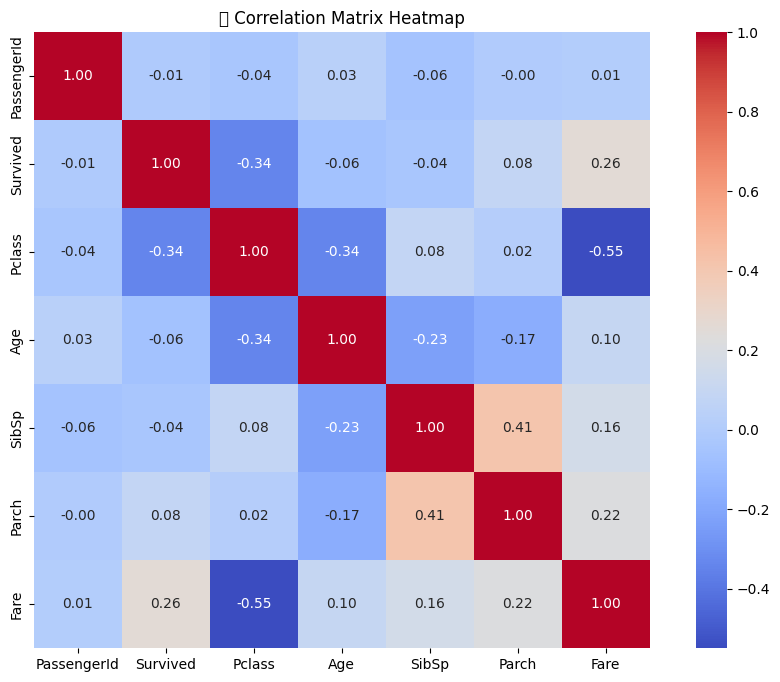

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


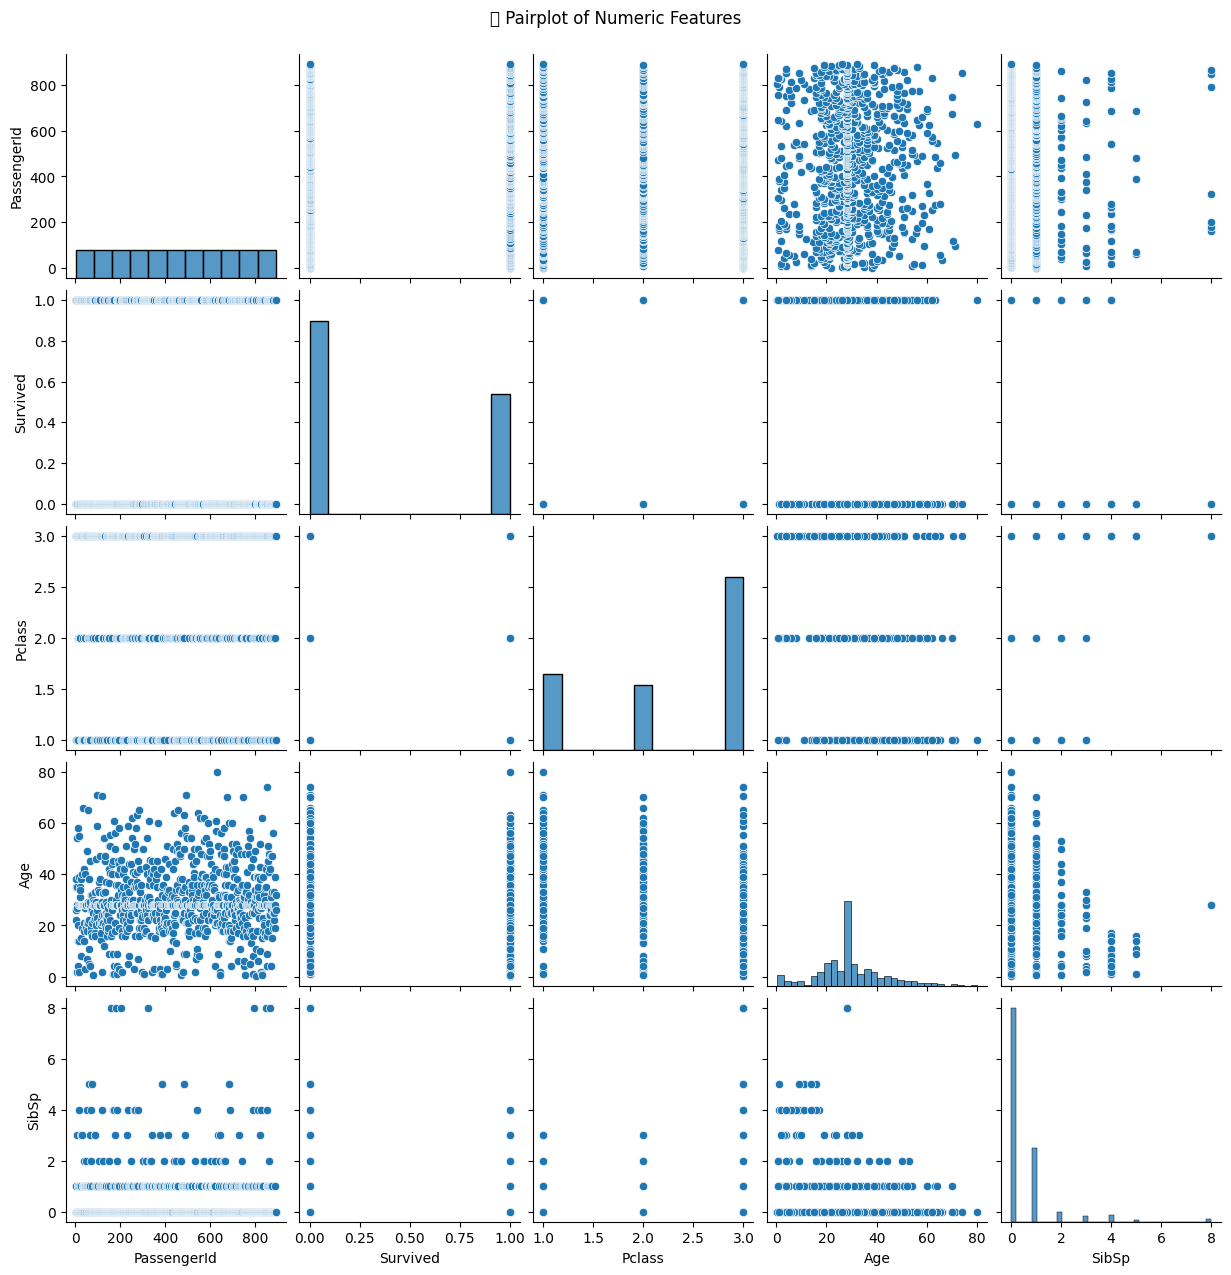

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 129485 (\N{STANDING PERSON}) missing from font(s) DejaVu Sans.



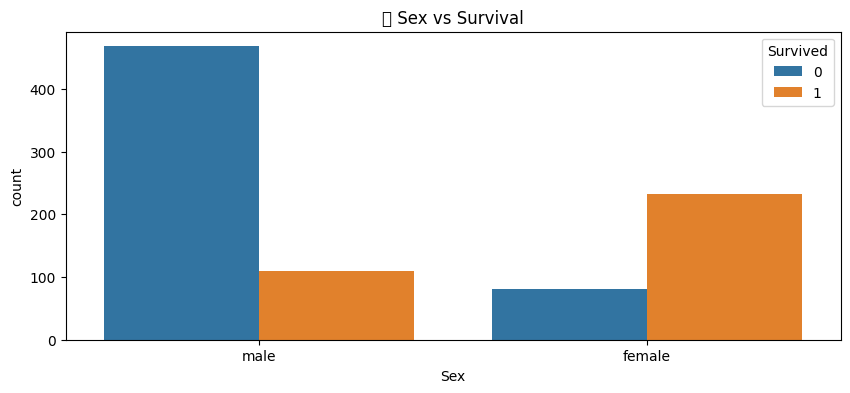

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128755 (\N{PASSENGER SHIP}) missing from font(s) DejaVu Sans.



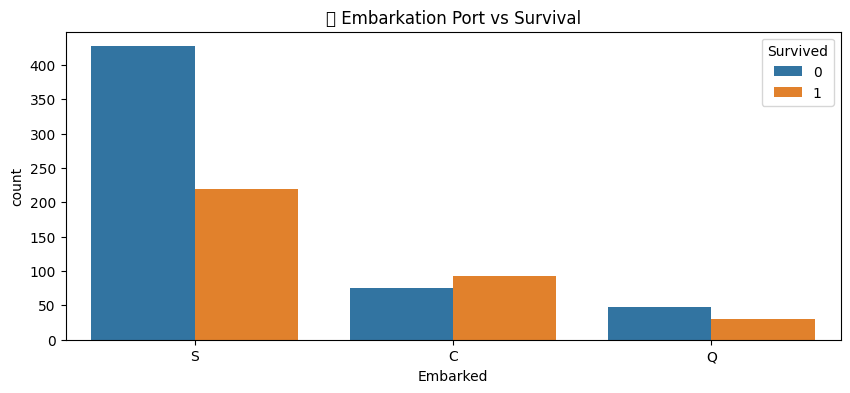


✅ EDA Complete! Explore the visual patterns for deeper feature-level insights.


In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import files
import io

# Step 2: Upload CSV File Manually
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(next(iter(uploaded.values()))))

# Step 3: Basic Info
print("🔹 Shape of the dataset:", df.shape)
print("\n🔹 Column names:\n", df.columns.tolist())
print("\n🔹 First 5 rows:\n", df.head())
print("\n🔹 Data types:\n", df.dtypes)
print("\n🔹 Missing values:\n", df.isnull().sum())

# Step 4: Summary Statistics
print("\n📊 Descriptive Statistics:\n", df.describe(include='all'))

# Step 5: Handle missing values (optional cleanup for visuals)
df_cleaned = df.copy()
df_cleaned['Age'] = df_cleaned['Age'].fillna(df_cleaned['Age'].median())
df_cleaned['Fare'] = df_cleaned['Fare'].fillna(df_cleaned['Fare'].median())
df_cleaned['Embarked'] = df_cleaned['Embarked'].fillna(df_cleaned['Embarked'].mode()[0])

# Step 6: Histograms for Numeric Features
df_cleaned.select_dtypes(include=np.number).hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle("📊 Histograms of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

# Step 7: Boxplots for Numeric Features
numeric_cols = df_cleaned.select_dtypes(include=np.number).columns
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols)//3 + 1, 3, i)
    sns.boxplot(x=df_cleaned[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Step 8: Correlation Matrix (Exclude non-numeric columns)
corr = df_cleaned[numeric_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("📌 Correlation Matrix Heatmap")
plt.show()

# Step 9: Pairplot (only for first 5 numeric columns to avoid overload)
sns.pairplot(df_cleaned[numeric_cols[:5]])
plt.suptitle("🔗 Pairplot of Numeric Features", y=1.02)
plt.show()

# Step 10: Plotly Interactive Scatter Matrix (if at least 3 numeric cols)
if len(numeric_cols) >= 3:
    fig = px.scatter_matrix(df_cleaned,
                            dimensions=numeric_cols[:4],
                            color='Survived',
                            title="🎯 Interactive Scatter Matrix (Plotly)")
    fig.show()

# Step 11: Categorical Insights (Sex vs Survived, Embarked vs Survived)
plt.figure(figsize=(10,4))
sns.countplot(data=df_cleaned, x='Sex', hue='Survived')
plt.title("🧍 Sex vs Survival")
plt.show()

plt.figure(figsize=(10,4))
sns.countplot(data=df_cleaned, x='Embarked', hue='Survived')
plt.title("🛳️ Embarkation Port vs Survival")
plt.show()

# Step 12: Final Message
print("\n✅ EDA Complete! Explore the visual patterns for deeper feature-level insights.")
